<a href="https://colab.research.google.com/github/hanah512/deep-learning/blob/master/PyTorchTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 60-minute Blitz


# Playing with Tensors

In [ ]:
import torch

In [ ]:
sizes = 4,2,6
x = torch.tensor(sizes)
print(x)

tensor([4, 2, 6])


In [ ]:
x = x.new_zeros(sizes)
print(x)

tensor([[[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]])


In [ ]:
y = torch.ones_like(x, dtype=float)
y[1:3,0,2:5] = 3
print(y)
print(y.size())

tensor([[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 3., 3., 3., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 3., 3., 3., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]], dtype=torch.float64)
torch.Size([4, 2, 6])


In [ ]:
z = x + y[1]
print(z)
print(x.dtype)
z.add_(y)
z[:,1,3] = 0
print(z)
print(z[:,:,3])

tensor([[[1., 1., 3., 3., 3., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 3., 3., 3., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 3., 3., 3., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 3., 3., 3., 1.],
         [1., 1., 1., 1., 1., 1.]]], dtype=torch.float64)
torch.int64
tensor([[[2., 2., 4., 4., 4., 2.],
         [2., 2., 2., 0., 2., 2.]],

        [[2., 2., 6., 6., 6., 2.],
         [2., 2., 2., 0., 2., 2.]],

        [[2., 2., 6., 6., 6., 2.],
         [2., 2., 2., 0., 2., 2.]],

        [[2., 2., 4., 4., 4., 2.],
         [2., 2., 2., 0., 2., 2.]]], dtype=torch.float64)
tensor([[4., 0.],
        [6., 0.],
        [6., 0.],
        [4., 0.]], dtype=torch.float64)


# Autograd

In [ ]:
import torch

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
print(y)
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# Import Data

Following is using a tutorial found at https://medium.com/dair-ai/pytorch-1-2-quickstart-with-google-colab-6690a30c38d

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as fun
import torchvision
import torchvision.transforms as trans
import matplotlib.pyplot as plt
import numpy as np

In [5]:
BATCH_SIZE = 32

transform = trans.Compose([trans.ToTensor()])

## training data set
trainset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

## testing data set
testset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


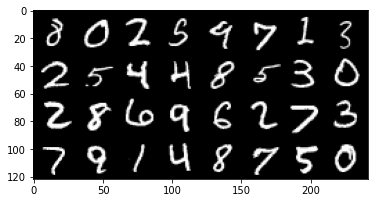

In [ ]:
def showImage(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## plot some random images to see what the data looks like
dataIter = iter(trainloader)
images, labels = dataIter.next()
showImage(torchvision.utils.make_grid(images))

In [ ]:
print("Image batch dimensions:", images.shape)
print("Image label dimensions:", labels.shape)

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


# Model

In [2]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # make 32 channels from 1 single-channel image, 28x28 to 26x26 dimensions
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)


    def forward(self, x):
        # 32 images x 1 channel x 28 x 28 => 32 images x 32 channels x 26 x 26
        x = self.conv1(x)
        x = fun.relu(x)

        # flatten to 32 x (32*26*26)
        x = x.flatten(start_dim=1)

        # output is 32 x 128
        x = self.d1(x)
        x = fun.relu(x)

        # output is 32 x 10
        logits = self.d2(x)
        out = fun.softmax(logits, dim=1)
        return out

In [6]:
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


# Training

In [4]:
learningRate = 0.001
numEpochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

## Compute accuracy for training
def getAccuracy(logit, target, batchSize):
    indices = torch.max(logit, 1)[1]
    corrects = (indices.view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / batchSize
    return accuracy.item()

In [9]:
for epoch in range(numEpochs):
    runningLoss = 0.0
    trainAccuracy = 0.0
    
    model = model.train()

    ## Training step
    for i, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model parameters
        optimizer.step()

        runningLoss += loss.detach().item()
        trainAccuracy += getAccuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, runningLoss / i, trainAccuracy / i))
    
    testAccuracy = 0.0
    for i, (images, labels) in enumerate(testloader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        testAccuracy += getAccuracy(outputs, labels, BATCH_SIZE)

    print('Test Accuracy: %.2f'%(testAccuracy / i))

Epoch: 0 | Loss: 1.4734 | Train Accuracy: 98.96
Test Accuracy: 98.51
Epoch: 1 | Loss: 1.4717 | Train Accuracy: 99.12
Test Accuracy: 98.47
Epoch: 2 | Loss: 1.4704 | Train Accuracy: 99.25
Test Accuracy: 98.46
Epoch: 3 | Loss: 1.4692 | Train Accuracy: 99.37
Test Accuracy: 98.46
Epoch: 4 | Loss: 1.4691 | Train Accuracy: 99.37
Test Accuracy: 98.58


In [8]:
testAccuracy = 0.0

for i, (images, labels) in enumerate(testloader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    testAccuracy += getAccuracy(outputs, labels, BATCH_SIZE)

print('Test Accuracy: %.2f'%(testAccuracy / i))

Test Accuracy: 98.20
